In [10]:
#Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
#Creating a timeseries wih seasonality & trend
np.random.seed(0)
date_range = pd.date_range(start='2023-01-01', periods = 365, freq = 'D')
trend = 0.3 * np.arange(365)
seas = 10 * np.sin(2*np.pi * np.arange(365)/30)
error = np.random.normal(0,3,365)
time_series = trend + seas + error

#Creating a datframe with time series data
data = pd.DataFrame({'Date':date_range, 'Value':time_series})
data.set_index('Date', inplace=True)

In [8]:
data

,Value
Date,
2023-01-01,5.292157
2023-01-02,3.579589
2023-01-03,7.603580
2023-01-04,13.500532
2023-01-05,14.234122
...,...
2023-12-27,110.095371
2023-12-28,110.390430
2023-12-29,115.462912


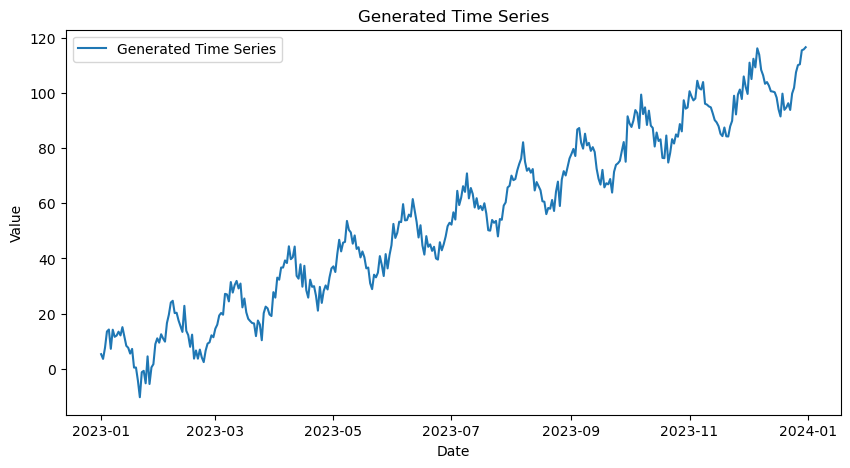

In [9]:
#Plotting the genrated time series
plt.figure(figsize=(10,5))
plt.plot(data.index, data['Value'], label='Generated Time Series')
plt.title('Generated Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Additive

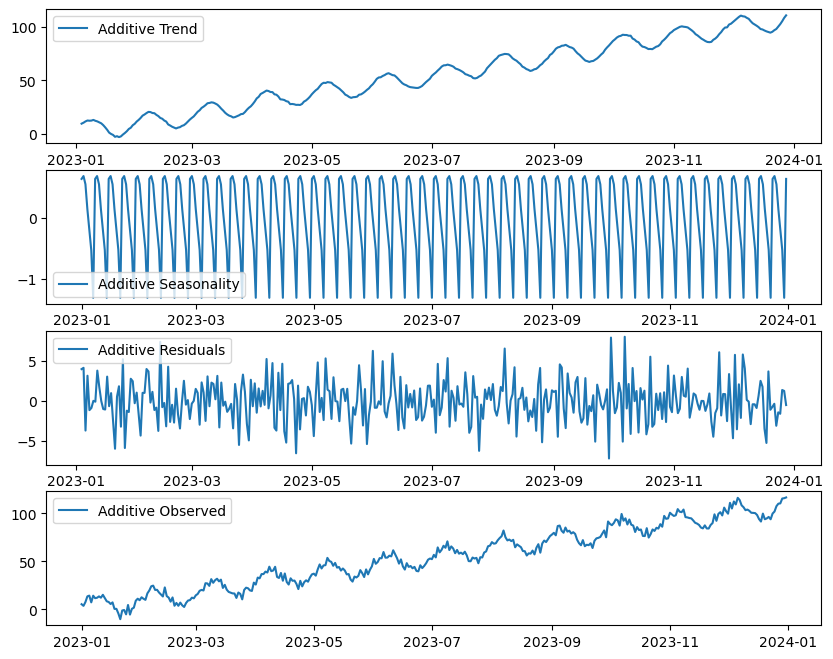

In [11]:
#Additive Model decomposition
additive_decomposition = sm.tsa.seasonal_decompose(data['Value'], model='additive')
#Plotting the decomposed components for both the model
plt.figure(figsize=(10, 8))

#Trend
plt.subplot(4,1,1)
plt.plot(additive_decomposition.trend, label='Additive Trend')
plt.legend()

#Seasonality
plt.subplot(4,1,2)
plt.plot(additive_decomposition.seasonal, label='Additive Seasonality')
plt.legend()

#Trend
plt.subplot(4,1,3)
plt.plot(additive_decomposition.resid, label='Additive Residuals')
plt.legend()

#Trend
plt.subplot(4,1,4)
plt.plot(additive_decomposition.observed, label='Additive Observed')
plt.legend()

In [13]:
data['Value'] = data['Value'] + abs(min(data['Value'])) + 1e-6

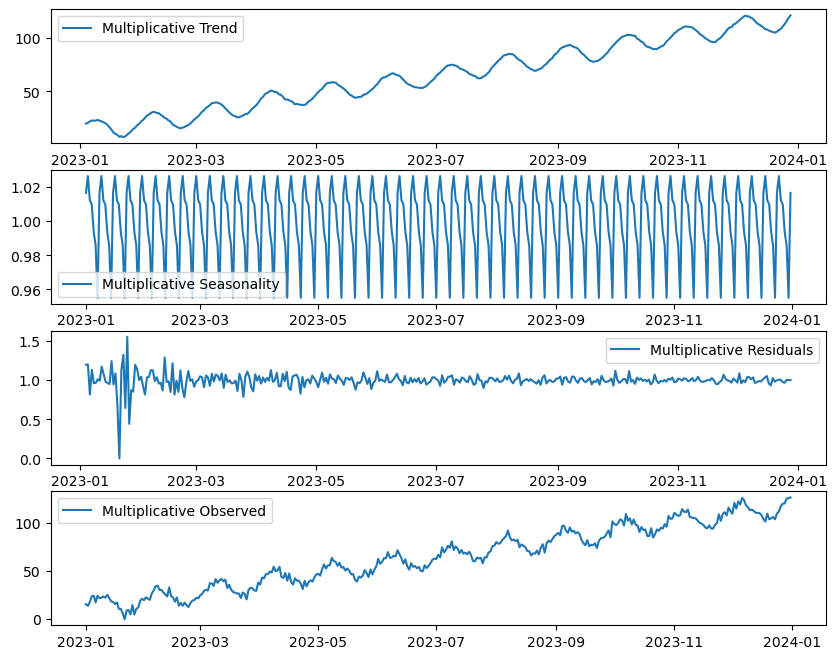

In [14]:
#Multiplicative Model decomposition
multiplicative_decomposition = sm.tsa.seasonal_decompose(data['Value'], model='multiplicative')
#Plotting the decomposed components for both the model
plt.figure(figsize=(10, 8))

#Trend
plt.subplot(4,1,1)
plt.plot(multiplicative_decomposition.trend, label='Multiplicative Trend')
plt.legend()

#Seasonality
plt.subplot(4,1,2)
plt.plot(multiplicative_decomposition.seasonal, label='Multiplicative Seasonality')
plt.legend()

#Trend
plt.subplot(4,1,3)
plt.plot(multiplicative_decomposition.resid, label='Multiplicative Residuals')
plt.legend()

#Trend
plt.subplot(4,1,4)
plt.plot(multiplicative_decomposition.observed, label='Multiplicative Observed')
plt.legend()

In [22]:
#Generating time series with a increasing trend & seasonal pattern
np.random.seed(0)
time = pd.date_range(start='2023-01-01', periods = 100, freq = 'M')
trend = 0.3 * np.arange(1, 101)
seas = 10 * np.sin(np.arange(1,101) * (2 * np.pi/12)) * 5

dataadditive = trend + seas
data_multiplication = trend * seas

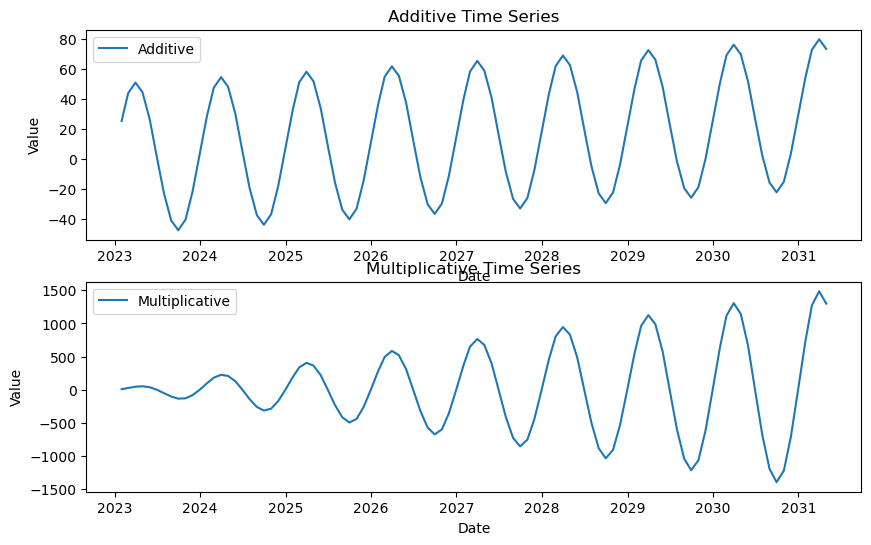

In [24]:
#Plotting the genrated time series
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(time, dataadditive, label='Additive')
plt.title('Additive Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.subplot(2,1,2)
plt.plot(time, data_multiplication, label='Multiplicative')
plt.title('Multiplicative Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()